# Recuperacion DS

## Ariketa 1

In [371]:
from lxml import html
import requests
import codecs
import Levenshtein
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize, sent_tokenize

from lxml import html
import requests
import codecs

import gensim

In [372]:
pagina = 'https://dreguera.github.io/'

In [373]:
page = requests.get(pagina)
tree = html.fromstring(page.content)

##### Primer y segundo mensaje de Dani Reguera

In [374]:
persona = tree.xpath("//div[@id='ariketa2']/div[@class='post']/div/span[@id='author']/text()") 

In [375]:
persona

['Dani Reguera dreguera@mondragon.edu',
 'Carlos Cernuda ccernuda@mondragon.edu',
 'Dani Reguera dreguera@mondragon.edu',
 'Carlos Cernuda ccernuda@mondragon.edu',
 'Sara Segura spsegura@mondragon.edu',
 'Aitor Bediaga abediaga@mondragon.edu',
 'Sara Segura spsegura@mondragon.edu',
 'Carlos Cernuda ccernuda@mondragon.edu']

In [376]:
mensaje = tree.xpath("//div[@id='ariketa2']/div[@class='post']/div/div[@id='content']/text()") 

In [377]:
mensaje

['He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?',
 'Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad. Hemos visto Optics, DBSCAN y HDSCAN',
 'MeanShift para clustering por densidad habeis visto? Yo suelo utilizar para datos numÃ©ricos y me da muy buenos resultados para descartar outliers',
 'Si, la verdad es que da buenos resultados pero cuando si puedes hacer ajustes manuales de otros parÃ¡metros, OPTICS y DBSCAN son mÃ¡s Ã³ptimos',
 'El tema del clutering por densidad me parece super interesante pero no se si tendrÃ\xada aplicabilidad en el Reto 7',
 'Creo que podrÃ\xadamos traer a una empresa para que les hablara de HDBSCAN',
 'Guay! me parece super interesante y puede ser super enriquecedor',
 'Perfecto']

In [378]:
a="Dani"
b=-1
for i in persona:
    e=i.split(' ')[0]
    b=b+1
    if Levenshtein.distance(e,a)==0:
        print(b)
        

0
2


In [379]:
file_docs=[]
file_docs2=[]
tokens = sent_tokenize(mensaje[0]) 
for line in tokens:
    file_docs.append(line) 
    
tokens = sent_tokenize(mensaje[2])
for line in tokens:
    file_docs2.append(line)

In [380]:
file_docs2

['MeanShift para clustering por densidad habeis visto?',
 'Yo suelo utilizar para datos numÃ©ricos y me da muy buenos resultados para descartar outliers']

In [381]:
gen_docs = [[w.lower() for w in word_tokenize(text)]  
            for text in file_docs]

In [382]:
gen_docs2 = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs2]

In [383]:
dictionary = gensim.corpora.Dictionary(gen_docs) 
print(dictionary.token2id)

{',': 0, '?': 1, 'algoritmos': 2, 'aprendizaje': 3, 'bastante': 4, 'bien': 5, 'clase': 6, 'clustering': 7, 'corrigiendo': 8, 'dado': 9, 'data': 10, 'de': 11, 'en': 12, 'estado': 13, 'han': 14, 'has': 15, 'he': 16, 'la': 17, 'los': 18, 'no': 19, 'parte': 20, 'realizado': 21, 'science': 22, 'supervisado': 23, 'trabajos': 24, 'y': 25, 'â¿quã©': 26}


In [384]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

In [385]:
tf_idf = gensim.models.TfidfModel(corpus)

In [386]:
tf_idf

In [387]:
sims = gensim.similarities.Similarity('a/',tf_idf[corpus],
                                        num_features=len(dictionary))

In [388]:
for line in file_docs2:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)

In [389]:
query_doc_tf_idf = tf_idf[query_doc_bow]


In [390]:
print('Comparing Result:', sims[query_doc_tf_idf]) 


Comparing Result: [0.]


In [391]:
sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))
print(sum_of_sims)

0.0


In [392]:
print(f'El porcentaje de similitud entre el primer y segundo mensaje de Dani Reguera: {float(sum_of_sims / len(file_docs)) * 100}')

El porcentaje de similitud entre el primer y segundo mensaje de Dani Reguera: 0.0


#### Primer y segundo mensaje de Carlos Cernuda

In [393]:
a="Carlos"
b=-1
for i in persona:
    e=i.split(' ')[0]
    b=b+1
    if Levenshtein.distance(e,a)==0:
        print(b)
        

1
3
7


In [394]:
file_docs=[]
file_docs2=[]
tokens = sent_tokenize(mensaje[1]) 
for line in tokens:
    file_docs.append(line) 
    
tokens = sent_tokenize(mensaje[3])
for line in tokens:
    file_docs2.append(line)

In [395]:
file_docs2

['Si, la verdad es que da buenos resultados pero cuando si puedes hacer ajustes manuales de otros parÃ¡metros, OPTICS y DBSCAN son mÃ¡s Ã³ptimos']

In [397]:
gen_docs = [[w.lower() for w in word_tokenize(text)]  
            for text in file_docs]

In [398]:
gen_docs2 = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs2]

In [399]:
dictionary = gensim.corpora.Dictionary(gen_docs) 
print(dictionary.token2id)

{',': 0, '.': 1, 'centrado': 2, 'clustering': 3, 'dani': 4, 'de': 5, 'densidad': 6, 'el': 7, 'en': 8, 'he': 9, 'hola': 10, 'la': 11, 'me': 12, 'no': 13, 'parte': 14, 'por': 15, 'sobre': 16, 'supervisado': 17, 'todo': 18, 'dbscan': 19, 'hdscan': 20, 'hemos': 21, 'optics': 22, 'visto': 23, 'y': 24}


In [400]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

In [401]:
tf_idf = gensim.models.TfidfModel(corpus)

In [402]:
tf_idf

In [403]:
for doc in tf_idf[corpus]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

[['.', 0.22], ['centrado', 0.22], ['clustering', 0.22], ['dani', 0.22], ['de', 0.22], ['densidad', 0.22], ['el', 0.22], ['en', 0.44], ['he', 0.22], ['hola', 0.22], ['la', 0.22], ['me', 0.22], ['no', 0.22], ['parte', 0.22], ['por', 0.22], ['sobre', 0.22], ['supervisado', 0.22], ['todo', 0.22]]
[['dbscan', 0.41], ['hdscan', 0.41], ['hemos', 0.41], ['optics', 0.41], ['visto', 0.41], ['y', 0.41]]


In [404]:
sims = gensim.similarities.Similarity('a/',tf_idf[corpus],
                                        num_features=len(dictionary))

In [405]:
for line in file_docs2:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)

In [406]:
query_doc_tf_idf = tf_idf[query_doc_bow]


In [407]:
print('Comparing Result:', sims[query_doc_tf_idf]) 


Comparing Result: [0.19518001 0.5477226 ]


In [408]:
sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))
print(sum_of_sims)

0.7429026


In [409]:
print(f'El porcentaje de similitud entre el primer y segundo mensaje de Carlos Cernuda: {float(sum_of_sims / len(file_docs)) * 100}')

El porcentaje de similitud entre el primer y segundo mensaje de Carlos Cernuda: 37.14512884616852


#### Primeros mensajes de Carlos y Sara

In [410]:
a="Carlos"
b=-1
for i in persona:
    e=i.split(' ')[0]
    b=b+1
    if Levenshtein.distance(e,a)==0:
        print(b)
        

1
3
7


In [411]:
a="Sara"
b=-1
for i in persona:
    e=i.split(' ')[0]
    b=b+1
    if Levenshtein.distance(e,a)==0:
        print(b)
        

4
6


In [412]:
file_docs=[]
file_docs2=[]
tokens = sent_tokenize(mensaje[1]) 
for line in tokens:
    file_docs.append(line) 
    
tokens = sent_tokenize(mensaje[4])
for line in tokens:
    file_docs2.append(line)

In [413]:
file_docs2

['El tema del clutering por densidad me parece super interesante pero no se si tendrÃ\xada aplicabilidad en el Reto 7']

In [414]:
gen_docs = [[w.lower() for w in word_tokenize(text)]  
            for text in file_docs]

In [415]:
gen_docs2 = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs2]

In [416]:
dictionary = gensim.corpora.Dictionary(gen_docs) 
print(dictionary.token2id)

{',': 0, '.': 1, 'centrado': 2, 'clustering': 3, 'dani': 4, 'de': 5, 'densidad': 6, 'el': 7, 'en': 8, 'he': 9, 'hola': 10, 'la': 11, 'me': 12, 'no': 13, 'parte': 14, 'por': 15, 'sobre': 16, 'supervisado': 17, 'todo': 18, 'dbscan': 19, 'hdscan': 20, 'hemos': 21, 'optics': 22, 'visto': 23, 'y': 24}


In [417]:
corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

In [418]:
tf_idf = gensim.models.TfidfModel(corpus)

In [419]:
tf_idf

In [420]:
for doc in tf_idf[corpus]:
    print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

[['.', 0.22], ['centrado', 0.22], ['clustering', 0.22], ['dani', 0.22], ['de', 0.22], ['densidad', 0.22], ['el', 0.22], ['en', 0.44], ['he', 0.22], ['hola', 0.22], ['la', 0.22], ['me', 0.22], ['no', 0.22], ['parte', 0.22], ['por', 0.22], ['sobre', 0.22], ['supervisado', 0.22], ['todo', 0.22]]
[['dbscan', 0.41], ['hdscan', 0.41], ['hemos', 0.41], ['optics', 0.41], ['visto', 0.41], ['y', 0.41]]


In [421]:
sims = gensim.similarities.Similarity('a/',tf_idf[corpus],
                                        num_features=len(dictionary))

In [422]:
for line in file_docs2:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)

In [423]:
query_doc_tf_idf = tf_idf[query_doc_bow]


In [424]:
print('Comparing Result:', sims[query_doc_tf_idf]) 


Comparing Result: [0.5819144 0.       ]


In [425]:
sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))
print(sum_of_sims)

0.5819144


In [426]:
print(f'El porcentaje de similitud entre los primeros mensajes de Carlos Cernuda y Sara Segura: {float(sum_of_sims / len(file_docs)) * 100}')

El porcentaje de similitud entre los primeros mensajes de Carlos Cernuda y Sara Segura: 29.09572124481201


#### Los mensajes que más se asemejan

In [427]:
count_vectorizer = CountVectorizer()
vectorizer = CountVectorizer().fit_transform(mensaje)
vectors = vectorizer.toarray()

In [428]:
vectors

array([[0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 3,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [429]:
csim=cosine_similarity(vectors)

In [430]:
csim

array([[1.        , 0.40567404, 0.03194383, 0.16574839, 0.07377111,
        0.13093073, 0.        , 0.        ],
       [0.40567404, 1.        , 0.18898224, 0.15689291, 0.34914862,
        0.05163978, 0.06030227, 0.        ],
       [0.03194383, 0.18898224, 1.        , 0.1111874 , 0.12371791,
        0.14638501, 0.05698029, 0.        ],
       [0.16574839, 0.15689291, 0.1111874 , 1.        , 0.12838815,
        0.15191091, 0.        , 0.        ],
       [0.07377111, 0.34914862, 0.12371791, 0.12838815, 1.        ,
        0.        , 0.32897585, 0.        ],
       [0.13093073, 0.05163978, 0.14638501, 0.15191091, 0.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.06030227, 0.05698029, 0.        , 0.32897585,
        0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ]])

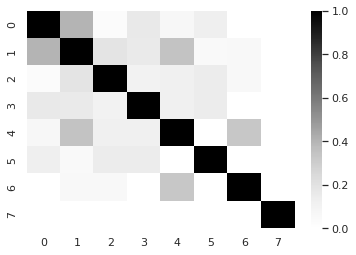

In [431]:
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(csim, cmap='Greys')

Los dos mensajes que mas se asemejan son el primero [0] y el segundo [1] con un 0.40567404.

## Ariketa 2

In [432]:
import pandas as pd

df= pd.read_csv("Spotify-2000.csv")

In [433]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [434]:
def combined_features(row):
    return row['Artist']+" "+row['Top Genre']
df["combined_features"] = df.apply(combined_features, axis =1)

In [435]:
vectorizer = CountVectorizer().fit_transform(df["combined_features"]) 
vectors = vectorizer.toarray() 

In [436]:
csim=cosine_similarity(vectors)

In [437]:
csim

array([[1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.5 ],
       [0.  , 1.  , 0.  , ..., 0.25, 0.  , 0.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.25, 0.  , ..., 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.5 , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]])

In [438]:
def get_title_from_index(Index):
    return df[df.Index == Index]["Title"].values[0]

In [439]:
song_index=get_title_from_index(6)
song_index

'The Road Ahead (Miles Of The Unknown)'

In [440]:
similar_songs = list(enumerate(csim[6])) 

In [441]:
sorted_similar_songs = sorted(similar_songs, key=lambda x:x[1], reverse=True)
sorted_similar_songs

[(6, 0.9999999999999998),
 (787, 0.9999999999999998),
 (1765, 0.4999999999999999),
 (24, 0.408248290463863),
 (51, 0.408248290463863),
 (57, 0.408248290463863),
 (66, 0.408248290463863),
 (75, 0.408248290463863),
 (81, 0.408248290463863),
 (85, 0.408248290463863),
 (93, 0.408248290463863),
 (120, 0.408248290463863),
 (122, 0.408248290463863),
 (125, 0.408248290463863),
 (174, 0.408248290463863),
 (176, 0.408248290463863),
 (191, 0.408248290463863),
 (210, 0.408248290463863),
 (235, 0.408248290463863),
 (243, 0.408248290463863),
 (246, 0.408248290463863),
 (255, 0.408248290463863),
 (256, 0.408248290463863),
 (265, 0.408248290463863),
 (266, 0.408248290463863),
 (280, 0.408248290463863),
 (285, 0.408248290463863),
 (289, 0.408248290463863),
 (294, 0.408248290463863),
 (295, 0.408248290463863),
 (297, 0.408248290463863),
 (301, 0.408248290463863),
 (304, 0.408248290463863),
 (351, 0.408248290463863),
 (362, 0.408248290463863),
 (367, 0.408248290463863),
 (412, 0.408248290463863),
 (415, 

In [442]:
def get_artist_from_index(index):
    return df[df.index == index]["Artist"].values[0]

In [443]:
print("Canciones similares a: "+get_title_from_index(6)+" de Artista: "+get_artist_from_index(6))
print("")
for song in sorted_similar_songs[1:6]:
    print(get_title_from_index(song[0])+"-> Artista: "+get_artist_from_index(song[0]))

Canciones similares a: The Road Ahead (Miles Of The Unknown) de Artista: Maroon 5

bad guy-> Artista: Maroon 5
Zelfs Je Naam Is Mooi-> Artista: Hero
Somebody Told Me-> Artista: BLØF
Just Breathe-> Artista: BLØF
Sometimes You Can't Make It On Your Own-> Artista: Beyoncé
